# analyze the NASHvsTREM2 comparisons

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

from IPython.display import display

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.5)

sns.set_style('white')

sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'

import sys

# % matplotlib inline

# loop over comparisons and summarize number significant up and down regulated genes

0
1
2
5
8
15


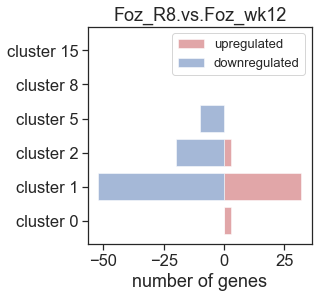

In [6]:
import os
focal_comp = 'Foz_wk12.vs.Foz_R8'

DE_focal_pos = pd.DataFrame()
DE_focal_neg = pd.DataFrame()
focal_clusters = [0,1,2,5,8,15]
for focal_cluster in focal_clusters:
    print(focal_cluster)
    fname = 'NASHvsREG_macrophage_clusters/'+focal_comp+'.cluster'+str(focal_cluster)+'.csv'
    if os.path.isfile(fname):
        DE_focal = pd.read_csv(fname,
                              sep=',',index_col='Unnamed: 0')
        DE_focal['Gene']=DE_focal.index.tolist()
        DE_focal.index=DE_focal['Gene']
        DE_focal=DE_focal[DE_focal['p_val_adj']<0.05]
        DE_pos = pd.DataFrame(DE_focal['avg_log2FC']>0)*1.0
        DE_pos.columns=['upregulated']

        DE_neg = pd.DataFrame(DE_focal['avg_log2FC']<0)*1.0
        DE_neg.columns=['downregulated']

    else:
        DE_pos = pd.DataFrame(columns=['upregulated'])
        DE_neg = pd.DataFrame(columns=['downregulated'])
    DE_focal_pos=DE_focal_pos.join(DE_pos,rsuffix='_'+str(focal_cluster),how='outer')
    DE_focal_neg=DE_focal_neg.join(DE_neg,rsuffix='_'+str(focal_cluster),how='outer')
DE_focal_pos=DE_focal_pos.fillna(0)
DE_focal_pos.head()

DE_focal_neg=DE_focal_neg.fillna(0)
DE_focal_neg.head()

num_upregulated = DE_focal_pos.sum()
num_downregulated = DE_focal_neg.sum()

# plt.figure(figsize=(4,4))
# plt.barh(np.arange(len(num_upregulated)),num_upregulated.tolist(),color='r',alpha=.5,
#         label='upregulated')
# plt.barh(np.arange(len(num_downregulated)),[-x for x in num_downregulated.tolist()],color='b',alpha=.5,
#         label='downregulated')
# tmp=plt.yticks(np.arange(len(num_upregulated)),['cluster '+str(i) for i in focal_clusters])
# plt.xlabel('number of genes')
# plt.legend(fontsize=13)
# plt.title(focal_comp)

# 7/13/23: soura requested to flip the sign of the comparison
plt.figure(figsize=(4,4))
plt.barh(np.arange(len(num_downregulated)),num_downregulated.tolist(),color='r',alpha=.5,
        label='upregulated')
plt.barh(np.arange(len(num_upregulated)),[-x for x in num_upregulated.tolist()],color='b',alpha=.5,
        label='downregulated')
tmp=plt.yticks(np.arange(len(num_upregulated)),['cluster '+str(i) for i in focal_clusters])
plt.xlabel('number of genes')
plt.legend(fontsize=13)
plt.title('Foz_R8.vs.Foz_wk12')

plt.savefig('figures/Foz_R8.vs.Foz_wk12_num_genes_per_cluster.pdf',dpi=300,bbox_inches='tight')

In [10]:
DE_focal.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
H2-Aa,7.894308e-07,-2.212429,0.95,1.000,0.013859
Cd74,7.894308e-07,-2.066473,0.95,1.000,0.013859
H2-Eb1,1.813765e-06,-2.270120,0.90,1.000,0.031842
H2-Ab1,5.698753e-06,-2.094208,0.95,1.000,0.100047
1110008F13Rik,9.889606e-06,0.788902,1.00,0.917,0.173622
